**Nicolas CAMBON & Justine FIEVE**

**Projet 1 - Master Sciences Cognivites**

#Détection de la langue d'un texte

**Le but de notre projet est de trouver les langues que le classifieur confond le plus en période de test à l'aide d'une matrice de confusion. Par la suite, pour remédier à ce problème, nous changerons le nombre de bigrammes tirés sur les textes de tests. Nous pensions que plus le nombre de bigrammes tirés pour chaque texte du test augmente, plus le classifieur de langue pourra discerner les langues qu'il confondait au début avec un tirage de 20 bigrammes. **


## Préparation des données

**Tout d'abord, nous récupérons les corpus d'apprentissage et de test.**

In [1]:
%%bash
wget http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_Apprentissage_Automatique/train.tgz
wget http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_Apprentissage_Automatique/test.tgz
tar xvfz train.tgz
tar xvfz test.tgz

train/
train/uk_iu-ud-train.txt
train/zh_gsd-ud-train.txt
train/la_ittb-ud-train.txt
train/af_afribooms-ud-train.txt
train/be_hse-ud-train.txt
train/cs_cac-ud-train.txt
train/fro_srcmf-ud-train.txt
train/hsb_ufal-ud-train.txt
train/mt_mudt-ud-train.txt
train/mr_ufal-ud-train.txt
train/en_lines-ud-train.txt
train/fr_sequoia-ud-train.txt
train/cu_proiel-ud-train.txt
train/fi_ftb-ud-train.txt
train/ro_rrt-ud-train.txt
train/sv_talbanken-ud-train.txt
train/hi_hdtb-ud-train.txt
train/en_esl-ud-train.txt
train/pl_sz-ud-train.txt
train/cs_pdt-ud-train.txt
train/bg_btb-ud-train.txt
train/el_gdt-ud-train.txt
train/fr_partut-ud-train.txt
train/sme_giella-ud-train.txt
train/da_ddt-ud-train.txt
train/qhe_hiencs-ud-train.txt
train/lv_lvtb-ud-train.txt
train/no_nynorsk-ud-train.txt
train/cs_fictree-ud-train.txt
train/en_ewt-ud-train.txt
train/ga_idt-ud-train.txt
train/fr_spoken-ud-train.txt
train/ca_ancora-ud-train.txt
train/sl_sst-ud-train.txt
train/ur_udtb-ud-train.txt
train/got_proiel-ud-train.tx

--2019-03-26 17:10:42--  http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_Apprentissage_Automatique/train.tgz
Resolving pageperso.lif.univ-mrs.fr (pageperso.lif.univ-mrs.fr)... 139.124.22.27
Connecting to pageperso.lif.univ-mrs.fr (pageperso.lif.univ-mrs.fr)|139.124.22.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29281190 (28M) [application/x-gzip]
Saving to: ‘train.tgz’

     0K .......... .......... .......... .......... ..........  0%  228K 2m5s
    50K .......... .......... .......... .......... ..........  0%  489K 92s
   100K .......... .......... .......... .......... ..........  0%  136M 61s
   150K .......... .......... .......... .......... ..........  0%  175M 46s
   200K .......... .......... .......... .......... ..........  0%  500K 48s
   250K .......... .......... .......... .......... ..........  1% 89.3M 40s
   300K .......... .......... .......... .......... ..........  1%  136M 34s
   350K .......... .......... .......... ......

**Nous faisons la liste des fichiers dont nous voulons se servir pour construire les données d'apprentissage.**
**A chaque corpus, nous associons un identificateur de la langue (en, fr, it ...).**

**Ici, nous avons ajouté beacoup plus de langues pour en avoir un plus grand panel afin que l'algorithme puisse avoir une plus grande base de données pour notre projet. Nous en avons sélectionnées 16. **

In [0]:
l_corpus_train=[
['en', './train/en_partut-ud-train.txt'],
['fr', './train/fr_sequoia-ud-train.txt'],
['it', './train/it_partut-ud-train.txt'],
['nl', './train/nl_lassysmall-ud-train.txt'],
['sl', './train/sl_sst-ud-train.txt'],
['es', './train/es_ancora-ud-train.txt'],
['pt', './train/pt_bosque-ud-train.txt'],
['de', './train/de_gsd-ud-train.txt'],
['ca', './train/ca_ancora-ud-train.txt'],
['af', './train/af_afribooms-ud-train.txt'],
['cs', './train/cs_cac-ud-train.txt'],
['da', './train/da_ddt-ud-train.txt'],
['et', './train/et_edt-ud-train.txt'],
['eu', './train/eu_bdt-ud-train.txt'],
['fi', './train/fi_tdt-ud-train.txt'],
['la', './train/la_ittb-ud-train.txt'],
]

**Par la suite, nous construisons un dictionnaire qui associe à chaque langue un identifiant numérique.**




In [3]:
def calculeCodeLangues(l_corpus):
    nbLangues = 0
    codeLangue = { }

    for corpus in l_corpus:
        idLangue = corpus[0]
        fichierCorpus = corpus[1]
        if not idLangue in codeLangue :
          print('langue :', idLangue, 'code = ', nbLangues)
          codeLangue[idLangue] = nbLangues
          nbLangues += 1
    return codeLangue

  
codeLangues = calculeCodeLangues(l_corpus_train)
  

langue : en code =  0
langue : fr code =  1
langue : it code =  2
langue : nl code =  3
langue : sl code =  4
langue : es code =  5
langue : pt code =  6
langue : de code =  7
langue : ca code =  8
langue : af code =  9
langue : cs code =  10
langue : da code =  11
langue : et code =  12
langue : eu code =  13
langue : fi code =  14
langue : la code =  15


**Nous extractons des corpus d'apprentissage des bigrammes dont nous calculons la fréquence.**
**Les fréquences de bigrammes sont stockées dans un fichier dont le format est le suivant :**
**chaque ligne se présente sous la forme de l'identificateur d'une langue, suivie de la fréquence des différents bigrammes dans un ordre fixé (voir la fonction bigram_code()).**

**Nous avons modifié le nombre de caractères pris en compte par la fonction char_code ainsi que les bigrammes (161 x 161) pour mieux différencier les langues qui se ressemblent mais possèdent des accents spécifiques. De plus, pour l'apprentissage, un texte sera sélectionné 600 fois et pour chaque tirage de texte, 1500 bigrammes seront piochés aléatoirement. Nous avons modifié ces deux paramètres car nos 160 caractères (1000 tirages de chaque texte avec 1000 bigrammes) nécéssitaient trop de mémoire et faisaient planter le serveur.** 

In [5]:
import random
import sys

def calculFreq(bigrammes):
    somme = 0
    for elt in bigrammes :
        somme += elt
    i = 0
    while i < len(bigrammes):
        bigrammes[i] /= somme
        i = i + 1

def afficheBigrammes(bigrammes, fic):
    for frequence in bigrammes :
        print(frequence, ' ', file = fic, end='')
    print('', file = fic)
        
def char_code(c): 
    if 'a' <= c and c <= 'ÿ':
        return ord(c) - ord('a')
    elif c == ' ':
        return 159
    else :
        return 160
    

def bigram_code(c1, c2):
    return (160 * char_code(c1)) + char_code(c2)

def process_corpus_random(corpus, maxBigrammes, maxTirage):
    try:
        fic = open(corpus, 'r')
    except IOError:
        print("le fichier", corpus, "n'existe pas")
        return None

    corpus_str = fic.read()
    longueur_corpus = len(corpus_str)
#    print("longueur corpus = ", longueur_corpus)
    fic.close()
    
    l_bigrammes = []
    tirage = 0
    while tirage < maxTirage:
        bigrammes = [0] * (161*161)
        nbBigrammes = 0
        while nbBigrammes <= maxBigrammes :
            position = random.randint(0,longueur_corpus - 2)
            code_bigramme = bigram_code(corpus_str[position], corpus_str[position + 1]) 
            bigrammes[code_bigramme] += 1
            nbBigrammes += 1
        calculFreq(bigrammes)
        l_bigrammes.append(bigrammes)
        tirage += 1
    return l_bigrammes

def process_corpus_sequential(corpus, maxBigrammes, maxTirage):
    try:
        fic = open(corpus, 'r')
    except IOError:
        print("le fichier", corpus, "n'existe pas")
        return None

    corpus_str = fic.read()
    longueur_corpus = len(corpus_str)
#    print("longueur corpus = ", longueur_corpus)
    fic.close()
    
    l_bigrammes = []
    tirage = 0
    while tirage < maxTirage:
        bigrammes = [0] * (161*161)
        nbBigrammes = 0
        position = random.randint(0,longueur_corpus - maxBigrammes - 2)
        while nbBigrammes <= maxBigrammes :
            code_bigramme = bigram_code(corpus_str[position], corpus_str[position + 1]) 
            bigrammes[code_bigramme] += 1
            nbBigrammes += 1
            position += 1
            
        calculFreq(bigrammes)
        l_bigrammes.append(bigrammes)
        tirage += 1
    return l_bigrammes

def extract_bigrams(l_corpus, mode, nbBigrammes, nbTirages, fichierSortie) :
    try:
        ficOut = open(fichierSortie, 'w')
    except IOError:
        print("le fichier", fichierSortie, "n'existe pas")
        exit

    for corpus in l_corpus:
        idLangue = corpus[0]
        fichierCorpus = corpus[1]
        print('traite corpus', fichierCorpus)
        if(mode == 'random'):
            l_bigrammes = process_corpus_random(fichierCorpus, nbBigrammes, nbTirages)
        else :
            l_bigrammes = process_corpus_sequential(fichierCorpus, nbBigrammes, nbTirages)
        for bigrammes in l_bigrammes:
            print(idLangue, ' ', file = ficOut, end='')
            afficheBigrammes(bigrammes, ficOut)
    ficOut.close
    
extract_bigrams(l_corpus_train, 'random', 1500, 600, 'train.dat')

traite corpus ./train/en_partut-ud-train.txt
traite corpus ./train/fr_sequoia-ud-train.txt
traite corpus ./train/it_partut-ud-train.txt
traite corpus ./train/nl_lassysmall-ud-train.txt
traite corpus ./train/sl_sst-ud-train.txt
traite corpus ./train/es_ancora-ud-train.txt
traite corpus ./train/pt_bosque-ud-train.txt
traite corpus ./train/de_gsd-ud-train.txt
traite corpus ./train/ca_ancora-ud-train.txt
traite corpus ./train/af_afribooms-ud-train.txt
traite corpus ./train/cs_cac-ud-train.txt
traite corpus ./train/da_ddt-ud-train.txt
traite corpus ./train/et_edt-ud-train.txt
traite corpus ./train/eu_bdt-ud-train.txt
traite corpus ./train/fi_tdt-ud-train.txt
traite corpus ./train/la_ittb-ud-train.txt


**Nous mettons en forme les données de manière à pouvoir les fournir au réseau de neurones pour l'apprentissage.**

In [6]:
import numpy as np
import sys

def lectureDonnees(nomFichier, codeLangue):
    try:
        fic = open(nomFichier, 'r')
    except IOError:
        print("le fichier", nomFichier, "n'existe pas")
        return None

    nbLangues = len(codeLangue.keys()) 
    lx = []
    langues = []
    for ligne in fic:
        ligne = ligne.strip('\n\r')
        liste = ligne.split()
        langue = liste.pop(0)
        langues.append(codeLangue[langue])
        resultat = [float(x) for x in liste]
        lx.append(resultat)
    fic.close()

    ly = []
    for i in range(len(langues)):
        v = [0] * nbLangues
        v[langues[i]] = 1
        ly.append(v)
    
    x_train = np.array(lx, dtype="float")
    y_train = np.array(ly, dtype="int")
    print(len(x_train), "exemples lus")
    #print(x_train)
    return (x_train, y_train)



(x_train, y_train) = lectureDonnees('train.dat', codeLangues)


9600 exemples lus


**Nous construisons la structure du réseau et nous faisons l'apprentissage.**

**Nous avons également modifier les dimensions de l'entrée sur la première couche corespondant au nouveau nombre de bigrammes (161 x 161).**

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
nbLangues = len(codeLangues.keys()) 

print('nbLangues =', nbLangues)

model.add(Dense(units=100, activation='relu', input_dim=161*161))
#model.add(Dropout(0.5))
model.add(Dense(units=nbLangues, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=100, batch_size=128)



Using TensorFlow backend.


nbLangues = 16
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
9600/9600 [==============================] - 7s 689us/step - loss: 2.7720 - acc: 0.0807
Epoch 2/100
9600/9600 [==============================] - 6s 622us/step - loss: 2.7719 - acc: 0.1117
Epoch 3/100
9600/9600 [==============================] - 6s 630us/step - loss: 2.7717 - acc: 0.1429
Epoch 4/100
9600/9600 [==============================] - 6s 627us/step - loss: 2.7716 - acc: 0.1198
Epoch 5/100
9600/9600 [==============================] - 6s 620us/step - loss: 2.7715 - acc: 0.1177
Epoch 6/100
9600/9600 [==============================] - 6s 620us/step - loss: 2.7714 - acc: 0.1923
Epoch 7/100
9600/9600 [==============================] - 6s 620us/step - loss: 2.7713 - acc: 0.1784
Epoch 8/100
9600/9600 [==============================] - 6s 617us/step - loss: 2.7711 - acc: 0.2199
Epoch 9/100
9600/9600 [==============================] - 6s 623us

** Nous chargeons les données de test puis nous rajoutons des textes de langues supplémentaires dans les données test conformémant à ceux mis en supplément dans les données d'apprentissages.**

In [0]:
%%bash
wget http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/MASCO_Apprentissage_Automatique/test.tgz
tar xvfz test.tgz


In [0]:
l_corpus_test=[
['en', './test/en_partut-ud-test.txt'],
['fr', './test/fr_sequoia-ud-test.txt'],
['it', './test/it_partut-ud-test.txt'],
['nl', './test/nl_lassysmall-ud-test.txt'],
['sl', './test/sl_sst-ud-test.txt'],
['es', './test/es_ancora-ud-test.txt'],
['pt', './test/pt_bosque-ud-test.txt'],
['de', './test/de_gsd-ud-test.txt'],
['ca', './test/ca_ancora-ud-test.txt'],
['af', './test/af_afribooms-ud-test.txt'],
['cs', './test/cs_pdt-ud-test.txt'],
['da', './test/da_ddt-ud-test.txt'],
['et', './test/et_edt-ud-test.txt'],
['eu', './test/eu_bdt-ud-test.txt'],
['fi', './test/fi_pud-ud-test.txt'],
['la', './test/la_perseus-ud-test.txt']
]

**Ici, nous extrayons les bigrammes de manière aléatoire dans les textes de test.**

In [10]:
extract_bigrams(l_corpus_test, 'random', 20, 100, 'test.dat')
(x_test, y_test) = lectureDonnees('test.dat', codeLangues)

traite corpus ./test/en_partut-ud-test.txt
traite corpus ./test/fr_sequoia-ud-test.txt
traite corpus ./test/it_partut-ud-test.txt
traite corpus ./test/nl_lassysmall-ud-test.txt
traite corpus ./test/sl_sst-ud-test.txt
traite corpus ./test/es_ancora-ud-test.txt
traite corpus ./test/pt_bosque-ud-test.txt
traite corpus ./test/de_gsd-ud-test.txt
traite corpus ./test/ca_ancora-ud-test.txt
traite corpus ./test/af_afribooms-ud-test.txt
traite corpus ./test/cs_pdt-ud-test.txt
traite corpus ./test/da_ddt-ud-test.txt
traite corpus ./test/et_edt-ud-test.txt
traite corpus ./test/eu_bdt-ud-test.txt
traite corpus ./test/fi_pud-ud-test.txt
traite corpus ./test/la_perseus-ud-test.txt
1600 exemples lus


**Nous évaluons le modèle sur les données de test.**

**De plus, nous créons une liste nommée Matrice_totale qui contiendra toutes les matrices de confusion pour les différents nombre de bigrammes tirés dans les textes de test.**

**Nous faisons également apparaitre la matrice de confusion issue d'un tirage de 20 bigrammes.**

In [0]:
l_id = [''] * len(codeLangues)
for (key, val) in (codeLangues.items()):
  #print("key =", key , 'val =', val)
  l_id[int(val)] = key

In [12]:
import numpy as np

def argmax(l):
  i = 1
  max = l[0] 
  arg = 0
  while i < len(l) :
    if l[i] > max :
      max = l[i]
      arg = i
    i = i + 1
  return arg


#score = model.evaluate(x_test, y_test)
#print('test.dat score = ', score)
l_pred = model.predict(x_test, batch_size=None, verbose=1, steps=None)

Matrice_total=[]
label_langue=[]
lab = []
for i in codeLangues:
  label_langue.append(i)
  lab.append(i)
label_langue.insert(0,"_")


table=[]
table.append(label_langue)
for i in range (len(lab)):
  ligne=[]
  ligne.append(lab[i])
  for p in range(len(lab)):
    ligne.append(0)
  table.append(ligne)


i = 0
while i < len(l_pred) :
  #print("l_pred = ", l_pred[i])
  predicted = l_id[argmax(l_pred[i])]
  gold = l_id[argmax(y_test[i])]
  #print('pred =', predicted, 'gold =', gold)
  table[codeLangues.get(gold)+1][codeLangues.get(predicted)+1] +=1
  i = i + 1

tableau = np.array(table)
matrice_confusion = tableau.reshape(len(codeLangues)+1,len(codeLangues)+1)
print(matrice_confusion)

Matrice_total.append(matrice_confusion)





1600/1600 [==============================] - 0s 304us/step
[['_' 'en' 'fr' 'it' 'nl' 'sl' 'es' 'pt' 'de' 'ca' 'af' 'cs' 'da' 'et'
  'eu' 'fi' 'la']
 ['en' '59' '2' '5' '1' '1' '0' '2' '13' '0' '2' '2' '5' '3' '1' '0' '4']
 ['fr' '5' '12' '2' '0' '2' '14' '2' '31' '4' '1' '1' '7' '6' '5' '1' '7']
 ['it' '1' '0' '30' '0' '44' '1' '8' '2' '1' '0' '1' '2' '0' '4' '0' '6']
 ['nl' '2' '0' '0' '23' '0' '0' '0' '44' '0' '11' '1' '12' '4' '2' '0'
  '1']
 ['sl' '0' '0' '2' '0' '90' '0' '0' '2' '0' '0' '0' '0' '3' '1' '0' '2']
 ['es' '1' '0' '7' '3' '8' '27' '19' '7' '3' '0' '0' '3' '3' '8' '1' '10']
 ['pt' '2' '2' '2' '0' '22' '7' '33' '10' '0' '1' '7' '2' '1' '2' '0' '9']
 ['de' '0' '0' '0' '2' '0' '0' '0' '76' '0' '6' '0' '8' '1' '0' '0' '7']
 ['ca' '1' '0' '2' '0' '8' '13' '7' '16' '21' '1' '3' '3' '2' '8' '0'
  '15']
 ['af' '7' '0' '0' '0' '1' '0' '0' '10' '0' '57' '0' '8' '8' '1' '0' '8']
 ['cs' '1' '1' '0' '1' '28' '0' '1' '10' '0' '0' '50' '0' '1' '5' '0' '2']
 ['da' '8' '0' '1' '2' '3' '

**Ici, nous déterminons à chaque langue cible quelle est la langue prédite par le classifieur avec laquelle elle est la plus confondue. Nous créons donc la variable langues_confondue, regroupant sous forme de liste, les couples de langues confondues par le classifieur.**

**Pour cela, nous avons définit un seuil de 50 % de bonnes réponses pour la langue cible. En d'autres termes, si le classifieur prédit la bonne langue au delà de 50%, nous ne prendrons pas en compte la langue la plus confondue avec cette dernière. De plus, les chiffres issus de la diagonale de la matrice de confusion sont exclus lors de la formation des couples de langue les plus confondues.**




In [13]:
langues_confondue=[]
for i in range (1,len(Matrice_total[0])):
  p=1
  grand = int( Matrice_total[0][i][p])
  if Matrice_total[0][i][0] == Matrice_total[0][0][1]:
    p+=1
    grand = int(Matrice_total[0][i][p])
    
  for k in range (1,len(Matrice_total[0][i])):
    if Matrice_total[0][i][0] != Matrice_total[0][0][k]:
      if int(Matrice_total[0][i][k]) > grand:
        grand = int(Matrice_total[0][i][k])
        label = Matrice_total[0][0][k]
    else:
      pourcentage_langue=int(Matrice_total[0][i][k])
 
  if pourcentage_langue <= 50 :
    langues_confondue.append([Matrice_total[0][i][0],label])   
  print("Pour la langue cible", Matrice_total[0][i][0],", le classifieur prédit cette même langue avec un pourcentage de",pourcentage_langue, "% et la confond le plus avec la langue",label, "avec une prédiction de", grand,"%.")
  

Pour la langue cible en , le classifieur prédit cette même langue avec un pourcentage de 59 % et la confond le plus avec la langue de avec une prédiction de 13 %.
Pour la langue cible fr , le classifieur prédit cette même langue avec un pourcentage de 12 % et la confond le plus avec la langue de avec une prédiction de 31 %.
Pour la langue cible it , le classifieur prédit cette même langue avec un pourcentage de 30 % et la confond le plus avec la langue sl avec une prédiction de 44 %.
Pour la langue cible nl , le classifieur prédit cette même langue avec un pourcentage de 23 % et la confond le plus avec la langue de avec une prédiction de 44 %.
Pour la langue cible sl , le classifieur prédit cette même langue avec un pourcentage de 90 % et la confond le plus avec la langue et avec une prédiction de 3 %.
Pour la langue cible es , le classifieur prédit cette même langue avec un pourcentage de 27 % et la confond le plus avec la langue pt avec une prédiction de 19 %.
Pour la langue cible pt

** Après avoir repéré les langues qui se confondent, nous effectuons l'extraction des bigrammes pour le test en augmentant leur nombre (50, 100,..., 1000).**

In [14]:
nb_bigrammes=[20,50,100,150,200,250,300,350,400,500,600,700,800,900,1000]

for bi in range (1,len(nb_bigrammes)):
  print(bi)
  extract_bigrams(l_corpus_test, 'random', nb_bigrammes[bi], 100, 'test.dat')
  (x_test, y_test) = lectureDonnees('test.dat', codeLangues)
  l_pred = model.predict(x_test, batch_size=None, verbose=1, steps=None)
  label_langue=[]
  lab = []
  for i in codeLangues:
    label_langue.append(i)
    lab.append(i)
  label_langue.insert(0,"_")


  table=[]
  table.append(label_langue)
  for i in range (len(lab)):
    ligne=[]
    ligne.append(lab[i])
    for p in range(len(lab)):
      ligne.append(0)
    table.append(ligne)
    
  i = 0
  while i < len(l_pred) :
    predicted = l_id[argmax(l_pred[i])]
    gold = l_id[argmax(y_test[i])]
    table[codeLangues.get(gold)+1][codeLangues.get(predicted)+1] +=1
    i = i + 1

  tableau = np.array(table)
  matrice_confusion = tableau.reshape(len(codeLangues)+1,len(codeLangues)+1)

  Matrice_total.append(matrice_confusion)


traite corpus ./test/en_partut-ud-test.txt
traite corpus ./test/fr_sequoia-ud-test.txt
traite corpus ./test/it_partut-ud-test.txt
traite corpus ./test/nl_lassysmall-ud-test.txt
traite corpus ./test/sl_sst-ud-test.txt
traite corpus ./test/es_ancora-ud-test.txt
traite corpus ./test/pt_bosque-ud-test.txt
traite corpus ./test/de_gsd-ud-test.txt
traite corpus ./test/ca_ancora-ud-test.txt
traite corpus ./test/af_afribooms-ud-test.txt
traite corpus ./test/cs_pdt-ud-test.txt
traite corpus ./test/da_ddt-ud-test.txt
traite corpus ./test/et_edt-ud-test.txt
traite corpus ./test/eu_bdt-ud-test.txt
traite corpus ./test/fi_pud-ud-test.txt
traite corpus ./test/la_perseus-ud-test.txt
1600 exemples lus
1600/1600 [==============================] - 0s 279us/step
traite corpus ./test/en_partut-ud-test.txt
traite corpus ./test/fr_sequoia-ud-test.txt
traite corpus ./test/it_partut-ud-test.txt
traite corpus ./test/nl_lassysmall-ud-test.txt
traite corpus ./test/sl_sst-ud-test.txt
traite corpus ./test/es_ancora

**Nous calculons le ratio de confusion entre les couples de langues, contenu dans la variable ratio_confond, avec la formule suivante : **

**1 - ((confusion entre langues 1 & 2) / (|nombre texte langue 1| + |nombre texte langue 2|))**

In [0]:
ratio_confond=[]
for i in range(len(langues_confondue)):
  rc=[]
  for k in range(len(Matrice_total)):
    lc=1-((float(Matrice_total[k][codeLangues.get(langues_confondue[i][0])+1][codeLangues.get(langues_confondue[i][1])+1])+
        float(Matrice_total[k][codeLangues.get(langues_confondue[i][1])+1][codeLangues.get(langues_confondue[i][0])+1]))/200)
    rc.append(lc)
  ratio_confond.append(rc)

**Enfin, nous affichons pour chaque couple de langues confondues, l'évolution du ratio de confusion en fonction de l'augmentation du nombre de bigrammes tirés.**

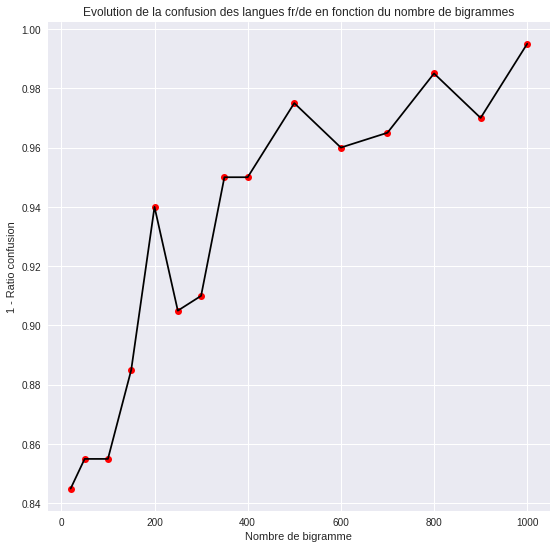

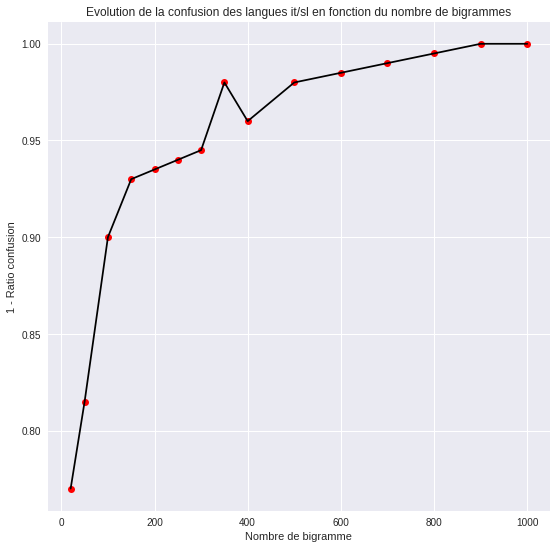

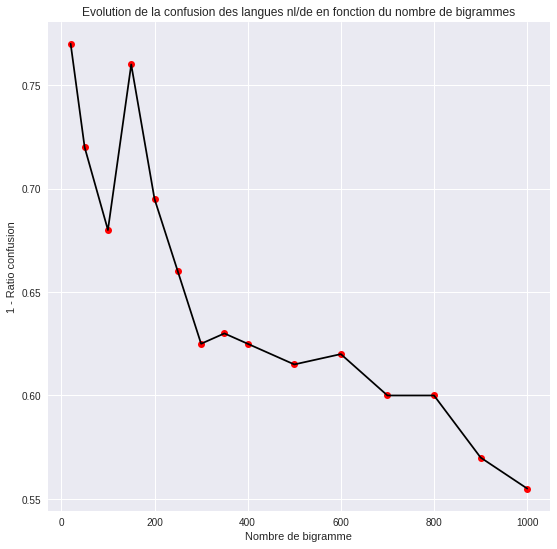

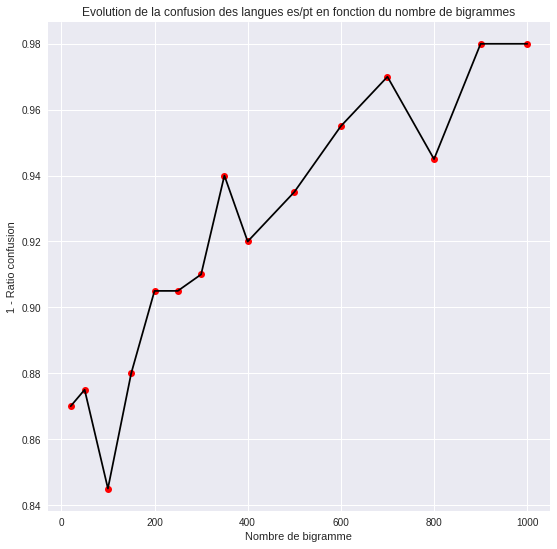

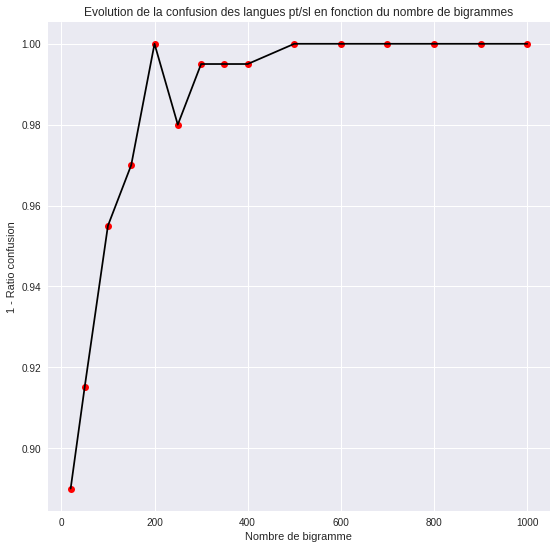

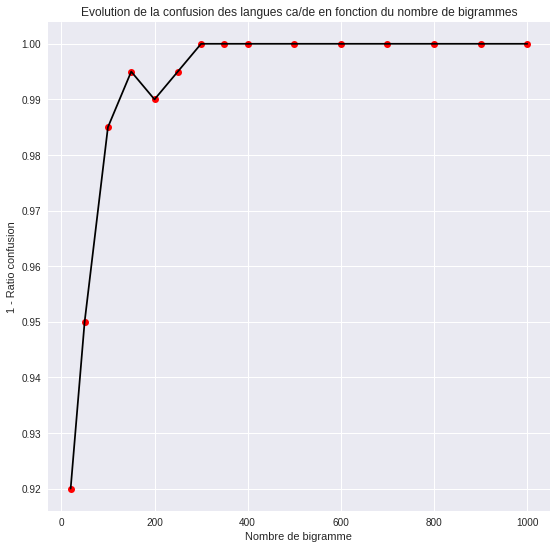

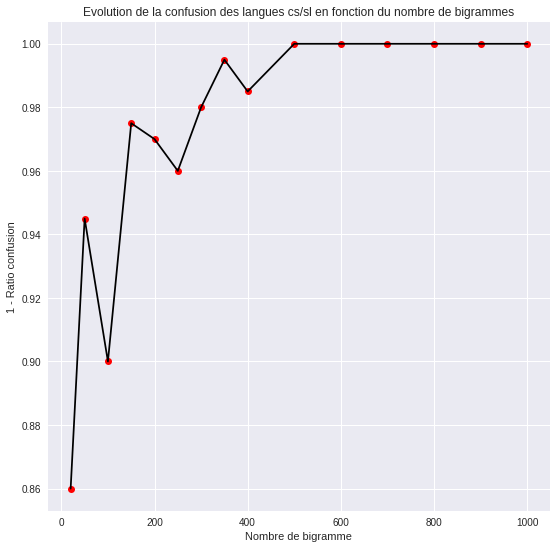

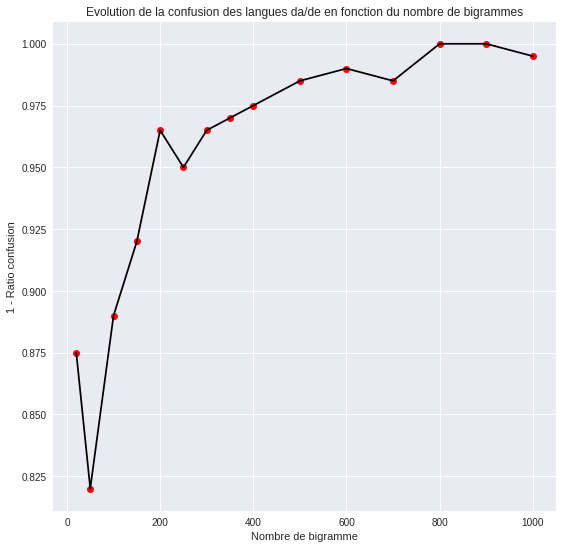

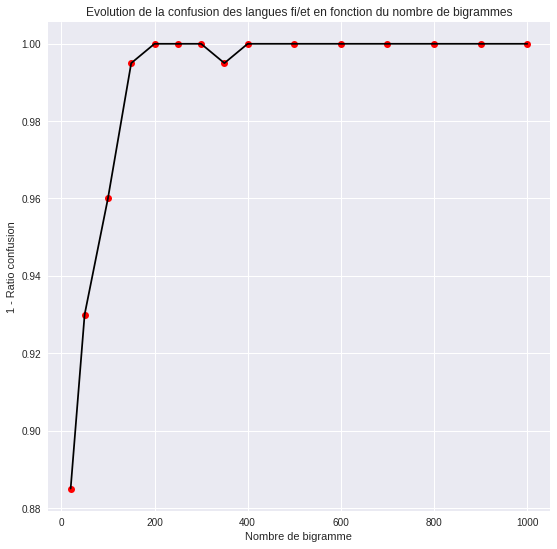

In [16]:
import matplotlib.pyplot as plt

for r in range(len(ratio_confond)):
  plt.figure(r,figsize=(9, 9))
  plt.plot(nb_bigrammes,ratio_confond[r],'ro',nb_bigrammes,ratio_confond[r],'k')
  plt.xlabel('Nombre de bigramme')
  plt.ylabel('1 - Ratio confusion')
  plt.title('Evolution de la confusion des langues %s en fonction du nombre de bigrammes'%(langues_confondue[r][0]+"/"+langues_confondue[r][1]))
  plt.show()

**D'après les courbes obtenues après plusieurs lancement du code entier, nous pouvons observer deux types de confusion.**

**La première est due à un faible tirage de bigrammes lors du premier test (seulement 20). Cette confusion est par la suite corrigée par l'amélioration de la performance du classifieur due par l'augmentation de bigrammes tirés. Ce premier point va dans le même sens que notre hypothèse de départ : plus il y a de bigrammes tirés et plus le ratio de confusion diminue.**

**Cependant, au bout d'un certain nombre de fois que l'on relance le code, nous pouvons observer un second type de confusion qui va à l'encontre de notre hypothèse. Nous pouvons voir que le classifieur a des difficultés à identifier correctement les langues qui sont très proches au niveau manuscrit. Dans ce cas, le ratio de confusion diminue peu avec l'augmentation de bigrammes tirés, voire même il prend la langue cible pour la langue confondue (courbe inversée). Cela peut être dû à l'aléatorisation de bigrammes tirés ou alors que le nombre de bigrammes tirés n'est pas assez important pour discriminer deux langues proches lors de la phase d'apprentissage. Pour contrer cela, nous pourrions modifier les paramètres d'apprentissage lors de l'extraction des bigrammes ou modifier les textes pris lors de cet apprentissage.**

